# Introduction
In this notebook, we will build some models to predict Premium staus and detail views of the product from this data. 
We will be using various regression and classification models for achieving the goal. Then analyzes the performance of each model and optimizes the performance.

**Notebook Contents**

This report is structured as follows:
> 1. Exploratory Data Analysis
>2 Data Understanding and Cleaning
>3.Data Exploration
>4. Data Modelling
>5. Analysis
> 3. Summary and Conclusion

First, we start with an exploratory data analysis of the data, in which we understand the data, clean it, and preprocess it. Individually analyze each feature of the data through visualization understands it. Then we deploy different prediction models and model the data, followed by a detailed analysis of the fitting of a different model. Finally concludes this report with a summary and conclusion.



# Exploratory Data analysis
In this section, we will try to understand the data in detail, then cleans the data if necessary. To fit a model accurately we need an idea of how different features perform. So we will be analyzing each feature of the data separately. Then we preprocess the data for data modeling.

## Data understanding and cleaning

This section comprises of initial and understanding of data and gets familiar with all attributes of the data. We will explore the data, by discovering the shape, types of attributes of data, whether data contains null values or duplicate entries.

In [2]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report
from sklearn.preprocessing import label_binarize
from colorsetup import colors, palette 
sns.set_palette(palette)
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [4]:
import warnings
warnings.filterwarnings("ignore")

Started with reading the 'AS24_Case_Study_Data.csv' data using Pandas. Then displayed the first ten rows of the data to get an idea about the data.

In [5]:
data = pd.read_csv('AS24_Case_Study_Data.csv',sep=';')

In [6]:
data.head(10)

article_id product_tier      make_name  price  first_zip_digit  \
0   350625839        Basic     Mitsubishi  16750                5   
1   354412280        Basic  Mercedes-Benz  35950                4   
2   349572992        Basic  Mercedes-Benz  11950                3   
3   350266763        Basic           Ford   1750                6   
4   355688985        Basic  Mercedes-Benz  26500                3   
5   361204569        Basic     Volkswagen  24890                6   
6   362784907        Basic           Fiat   2850                7   
7   363942101        Basic        Renault  23740                2   
8   358875204        Basic        Renault   7850                6   
9   357547566        Basic          Mazda  13950                3   

   first_registration_year created_date deleted_date  search_views  \
0                     2013     24.07.18     24.08.18        3091.0   
1                     2015     16.08.18     07.10.18        3283.0   
2                     1998     16.07.18     05.09.18        3247.0   
3                     2003     20.07.18     29.10.18        1856.0   
4                     2014     28.08.18     08.09.18         490.0   
5                     2017     20.10.18     22.10.18         125.0   
6                     2008     08.11.18     09.11.18         172.0   
7                     2018     20.11.18     15.02.19        1499.0   
8                     2016     24.09.18     08.12.18        4329.0   
9                     2016     08.09.18     10.10.18        2257.0   

   detail_views  stock_days                   ctr  
0         123.0          30   0.03780329990294403  
1         223.0          52   0.06792567773378008  
2         265.0          51    0.0816137973514013  
3          26.0         101  0.014008620689655173  
4          20.0          12   0.04081632653061224  
5           6.0           2                 0.048  
6           4.0           1  0.022093023255813953  
7          99.0          87   0.06274182788525684  
8         133.0          75  0.030723030723030724  
9          89.0          32   0.03943287549844927

In [7]:
data.shape

(78321, 12)

This data contains, total of 78321 rows and 12 columns. The description of each column and what information it gives is given below.

* article_id : Unique article identifier.
* product_tier :Premium status of the article
* make_name : Name of the car manufacturer
* price : Price of the article
* first_zip_digit : First digit of the zip code of the region the article is offered in
* first_registration_year :Year of the first registration of the article
* created_date : creation Date of the listing
* deleted_date:Deletion date of the listing
* search_views :Number of times the article has been shown as a search result
* detail_views:Number of times the article has been clicked on
* stock_days : Time in days between the creation of the listing and the deletion of the listing
* ctr:Click through rate calculated as the quotient of detail_views over search_views

As a first step, we will print the general info about the data, which shows the number of non-null values and the type of each column.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


From the info column above, we could see that some columns contain null values, so we will look into it in detail.

In [9]:
print(data.isnull().sum())


article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64


In [10]:
null = round(100*data.isnull().sum()/data.shape[0],2)
print(null)

article_id                 0.00
product_tier               0.00
make_name                  0.00
price                      0.00
first_zip_digit            0.00
first_registration_year    0.00
created_date               0.00
deleted_date               0.00
search_views               0.01
detail_views               0.01
stock_days                 0.00
ctr                        0.03
dtype: float64


So the table above shows, the columns 'search_views', 'detail_views', and 'ctr' contain null values. But the percentage of null values contained in these columns are very less. So we could simply replace these values with the mode of the column.

In [11]:
data["search_views"].fillna(data['search_views'].mode()[0], inplace=True)
data["detail_views"].fillna(data['detail_views'].mode()[0], inplace=True)
data["ctr"].fillna(data['ctr'].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

article_id                 0
product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
created_date               0
deleted_date               0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

So we successfully replaced all the null values with zero and now our data doesn't contain any null values.

Now we will look into the types of each column and whether it is a categorical value or a numerical value.


In [13]:
data.dtypes

article_id                   int64
product_tier                object
make_name                   object
price                        int64
first_zip_digit              int64
first_registration_year      int64
created_date                object
deleted_date                object
search_views               float64
detail_views               float64
stock_days                   int64
ctr                         object
dtype: object

So the above cell shows that, the columns 'product_tier','make_name','created_date','deleted_date','ctr' and all the other columns contains numerical values. 

Since the column 'article_id' represents a unique id of the article, we should change the type of it to a categorical value. Also 'first_registration_year' represents the year of the first registration, so it should be a categorical value. So for the easiness of the analysis, we will change the type of these columns.



In [14]:
data['article_id'] = data['article_id'].astype(str)
data['first_registration_year'] = data['first_registration_year'].astype(str)

Also, the column 'ctr' is labeled as a categorical column. Since the value of 'ctr' gives information about Click through rate, it must be a numerical column. So we will convert this column to a float type.

But before changing the type, I could find out there are some wrong entries in this column, which means some entries are not numerical. So I replaced these non-numerical entries with zero.

In [15]:
import re 
pat = "^\d+\.\d+\.\d+\.\d+\.\d+\.\d+$"
pat1 = "^\d+\.\s?\D+$"
data['ctr']=data['ctr'].str.replace(pat,'0.0',regex=True)
data['ctr']=data['ctr'].str.replace(pat1,'0.0',regex=True)

In [16]:
data['ctr'] = data['ctr'].astype(float)

In [17]:
max(data['ctr'])

87.5

Then checked the statistical details of all the numerical columns. 

In [18]:
data.describe()

price  first_zip_digit   search_views  detail_views  \
count   78321.000000     78321.000000   78321.000000  78321.000000   
mean    15067.655316         4.632117    2297.230883     93.458191   
std     16374.497606         2.354275    6338.675303    228.013372   
min         1.000000         1.000000       0.000000      0.000000   
25%      5750.000000         3.000000     367.000000     13.000000   
50%     10900.000000         5.000000     920.000000     36.000000   
75%     18890.000000         7.000000    2233.000000     94.000000   
max    249888.000000         9.000000  608754.000000  13926.000000   

         stock_days           ctr  
count  78321.000000  78321.000000  
mean      35.986262      0.047855  
std       32.214835      0.327146  
min       -3.000000      0.000000  
25%       10.000000      0.024030  
50%       25.000000      0.037879  
75%       55.000000      0.058163  
max      127.000000     87.500000

The values in the price column range from 1 to 249888 with a mean of 15067.65. When we look into the statistics of the stock days we could see that the minimum of this column is -3. Values below zero seem to be wrong for this column, since stock days are the time in days between the creation of the listing and the deletion of the listing, it cannot have a negative value in the practical case. So we have to clean these negative values for this column. 

In [19]:
(data.stock_days<0).sum()

93

There are 93 negative values in this column and we will replace these negative values to zero instead of deleting these entries. 

In [20]:
data['stock_days']= data['stock_days'].apply(lambda x: x if x>0 else 0)

In [21]:
(data.stock_days<0).sum()

0

### Outlier detection
As a next step of cleaning our data, we will check for the outliers in the data and manages them. To check the presence of outliers on any column, checked the values that are higher than 1.5 times Interquartile Range(IQR) from the upper quartile and lower than 1.5 times the interquartile range from the lower quartile.

In [23]:
data.dtypes

article_id                  object
product_tier                object
make_name                   object
price                        int64
first_zip_digit              int64
first_registration_year     object
created_date                object
deleted_date                object
search_views               float64
detail_views               float64
stock_days                   int64
ctr                        float64
dtype: object

In [24]:
num_columns=data.dtypes[data.dtypes != np.object].index.tolist()

price : 4606
price : 5.88 %


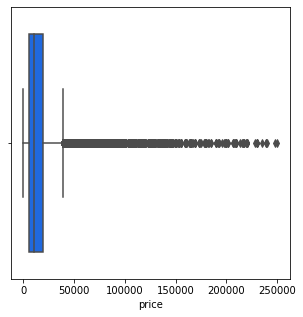

search_views : 7449
search_views : 9.51 %


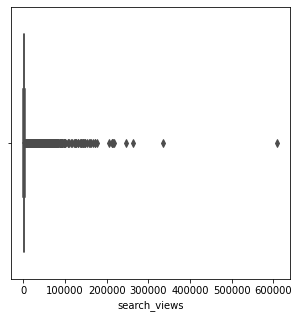

detail_views : 7588
detail_views : 9.69 %


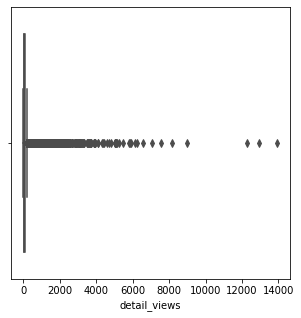

stock_days : 611
stock_days : 0.78 %


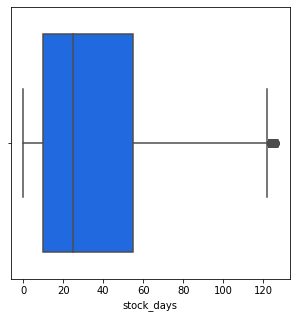

ctr : 4003
ctr : 5.11 %


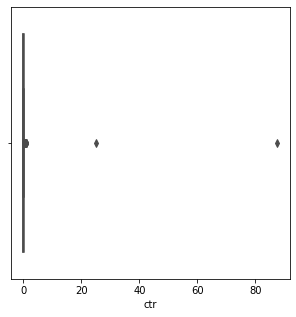

['price', 'search_views', 'detail_views', 'stock_days', 'ctr']


In [25]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=True):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            print(col, ":", round(100*(number_of_outliers/dataframe.shape[0]),2),"%")
            variable_names.append(col)
            if plot:
                plt.figure(figsize=(5,5))
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

#print(num_columns)

print(has_outliers(data, num_columns))

The presence of outliers has been found in the numerical columns. The number and percentage of outliers present in each column and visualization of outliers on the box plots are shown above. 

So the Price column contains around 6% of outliers. I believe we don't need to remove or change these outliers. Since the price of basic to plus status product range differently, these outliers are original price values of some expensive products. So we will retain this value.

Also the columns, search views have 10% of outliers values. So there is a large number of outliers presented in these columns. Like the price column, we will replace these outliers with mean values. These outliers give useful information about why search views and detail views have this high number of searches.

Since the detail views are one of our target columns, we will retain the outliers of this column.
But we will correct the outliers of 'stock_days' and ctr columns. For both columns outliers have values higher than the upper quartile, So we will replace these outlier values with the mean of the column.



In [26]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    



In [27]:
replace_with_thresholds(data,'stock_days')

replace_with_thresholds(data,'ctr')

In [28]:
replace_with_thresholds(data,'search_views')

In [29]:
data.search_views.mode()[0]

5032.0

So we cleaned our data by removing null values, outliers, and some impractical values found in some of the columns. The next step of this analysis would be a detailed analysis of each column in the data and discovering the distribution of each column. 

## Data Exploration

In this section, we will go through each column in more detail and will try to find out the structure of each column. 
First, we will analyze the categorical columns, we will examine the different categories present in them and the different features of each column.

In [30]:
cata_cols = data.dtypes[data.dtypes == np.object].index.tolist()
cata_cols

['article_id',
 'product_tier',
 'make_name',
 'first_registration_year',
 'created_date',
 'deleted_date']

Since the column 'article_id' gives just the unique identification of each article, we will leave this column from further analysis and starts from 'product_tier' column.

### Product tier

As mentioned earlier, this column gives information about the premium status of the article. This column is one of the target columns of this analysis so we will analyze the different premium statuses and their distributions.



In [31]:
data.product_tier.value_counts()

Basic      75421
Premium     2324
Plus         576
Name: product_tier, dtype: int64

In [32]:
data.product_tier.value_counts(normalize=True)

Basic      0.962973
Premium    0.029673
Plus       0.007354
Name: product_tier, dtype: float64

So there is a total three premium status of product present in the data, they are 'Basic', 'Premium', 'Plus'. We could see that, of all these three categories, the  'Basic' status consists of around 96% of values. The other two statuses are very small in number, 'Premium' of around 3% and 'Plus' of 0.7%. 




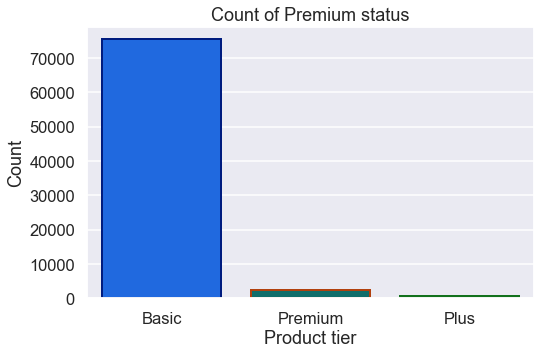

In [33]:
sns.set_context('talk')
sns.color_palette()
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.countplot(x='product_tier',data=data, linewidth=2,edgecolor=sns.color_palette("dark"))
plt.xlabel('Product tier')
plt.ylabel('Count')
plt.title('Count of Premium status');


The count plot clearly visualize the difference between the basic premium status and other statuses, so we could say that the data is highly unbalanced.

Next we will look into the column 'make_name'

### Name of the Manufacture

The column 'make_name', gives the name of the car manufacturer. Here we will look into the different car companies present in the data and how the counts are distributed.

In [34]:
len(data.make_name.unique())

91

There are 91 unique manufacturers in this data set, but most of these manufactures have only one entry in the data. We will look at the top ten manufactures of this data set.

In [35]:
data.make_name.value_counts()

Volkswagen    9430
Renault       6956
Peugeot       5446
Opel          5218
Ford          5199
              ... 
MAN              1
AC               1
Kawasaki         1
KTM              1
Piaggio          1
Name: make_name, Length: 91, dtype: int64

In [36]:
data.make_name.value_counts().head(10)

Volkswagen       9430
Renault          6956
Peugeot          5446
Opel             5218
Ford             5199
Mercedes-Benz    4766
BMW              4554
Volvo            3994
Toyota           3924
Audi             3313
Name: make_name, dtype: int64

In [37]:
data.make_name.value_counts(normalize=True).head(10)

Volkswagen       0.120402
Renault          0.088814
Peugeot          0.069534
Opel             0.066623
Ford             0.066381
Mercedes-Benz    0.060852
BMW              0.058145
Volvo            0.050995
Toyota           0.050102
Audi             0.042300
Name: make_name, dtype: float64

So the above table shows the top ten manufacturers with 'Volkswagen'(12%) on top and 'Renault'(8%) on the second. Below we will plot the distribution of count of all manufacturers.

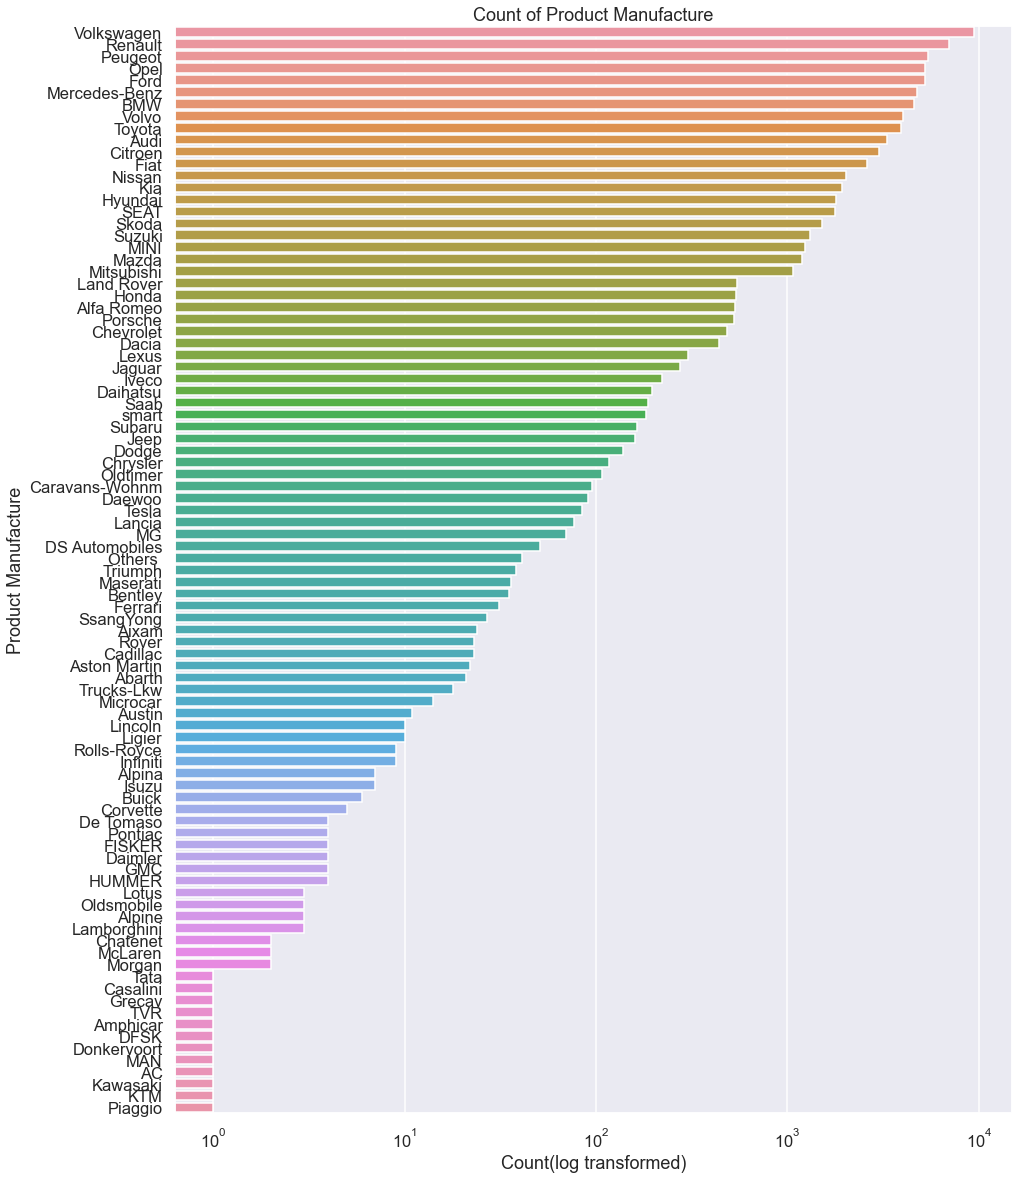

In [38]:
sns.set_context('talk')
sns.color_palette()
sns.set_style("darkgrid")
plt.figure(figsize=(15,20))
sns.countplot(y='make_name',data=data,order=data["make_name"].value_counts().index,
              log=True)
plt.ylabel('Product Manufacture')
plt.xlabel('Count(log transformed)')
plt.title('Count of Product Manufacture');



Due to the high difference in the counts of various brands, log-transformed the count for the ease of plotting and analysis. The count plot, visualize the discrepancy in the count and how it varies for various brands.

In [39]:
top_ten=data.make_name.value_counts().head(10).index.to_list()

In [40]:
data_top_ten = data[data['make_name'].isin(top_ten)]


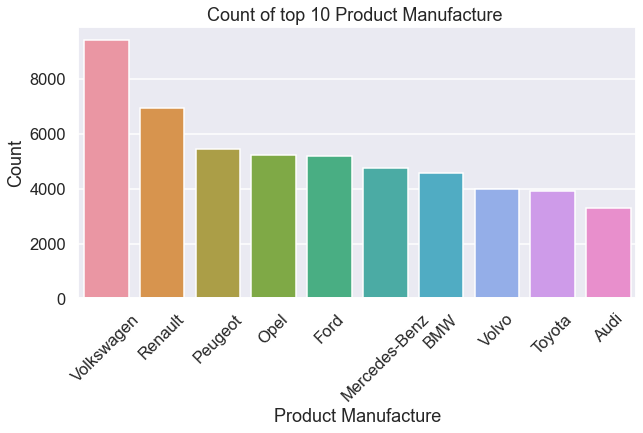

In [41]:
sns.set_context('talk')
sns.color_palette()
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x='make_name',data=data_top_ten,order=data_top_ten["make_name"].value_counts().index)
plt.xlabel('Product Manufacture')
plt.ylabel('Count')
plt.xticks(rotation=45);
plt.title('Count of top 10 Product Manufacture ');

This count plot shows, the variation in counts of the top ten brands. The difference in the count of brands from Volkswagen is clearly distinguishable. 

### First registration year

This Column tells us about the year of the first registration of the article. There is a total of 87 years for the first registration started from 1924 to 2020.

In [42]:
len(data.first_registration_year.unique())

87

There is a wrong year value of '2106' in this column, so we have to remove this entry. 

In [43]:
data=data[data['first_registration_year'] != '2106']

In [44]:
print('The first year of registraion is:',min(data.first_registration_year.unique()))
print('The last year of registraion is:',max(data.first_registration_year.unique()))


The first year of registraion is: 1924
The last year of registraion is: 2020


In [45]:
year=data.first_registration_year.value_counts().index
count=data.first_registration_year.value_counts()
count_df = pd.DataFrame({'year':year,'Count' : count})

In [46]:
count_df=count_df.sort_values('year')

In [47]:
data.first_registration_year.unique()

array(['2013', '2015', '1998', '2003', '2014', '2017', '2008', '2018',
       '2016', '2010', '2007', '2004', '2005', '2012', '2009', '2011',
       '1997', '2006', '1996', '1999', '2002', '2001', '1954', '2000',
       '1994', '1966', '1988', '1981', '1989', '1991', '1993', '1984',
       '1987', '1983', '1958', '2019', '1986', '1970', '1977', '1972',
       '1960', '1973', '1992', '1952', '1975', '1995', '1980', '1959',
       '1968', '1990', '1976', '1978', '1979', '1974', '1965', '1969',
       '1943', '1962', '1963', '1955', '1971', '1964', '1985', '1967',
       '1936', '1953', '1947', '1956', '1949', '1931', '1932', '1941',
       '1957', '1961', '1982', '1935', '1946', '1924', '1950', '1942',
       '1928', '1933', '1925', '1939', '2020', '1951'], dtype=object)

<Figure size 360x1080 with 0 Axes>

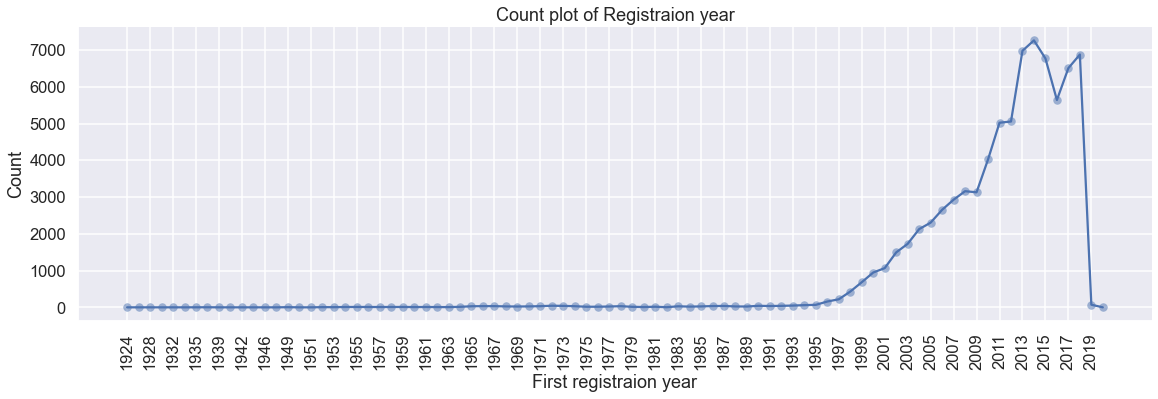

In [48]:

plt.figure(figsize=(5,15));
sns.set_theme('talk')
ax=sns.relplot(x="year",y="Count",data=count_df,kind='scatter',height=5, aspect=17/5.27,alpha=.5)
ax=sns.lineplot(x="year", y="Count", data=count_df)
plt.xticks(rotation=90)
ax.set_xticks(ax.get_xticks()[::2])
plt.ylabel("Count")
plt.xlabel('First registraion year')
plt.title('Count plot of Registraion year');


The count plot of the first registration year shows that there is a clear spike in registration after 1996, and then it continues to increase from 1996 onwards. There is a small dip in the year in 2016 and then increases again. The very low count in 2020 is due to the fact that data doesn't contain values of the whole 2020.

In [49]:
data.first_registration_year.value_counts().head(10)

2014    7260
2013    6978
2018    6876
2015    6769
2017    6506
2016    5640
2012    5055
2011    5021
2010    4022
2008    3159
Name: first_registration_year, dtype: int64

Now we will analyse the numerical columns and see how the values are distributed.

In [50]:
num_columns

['price',
 'first_zip_digit',
 'search_views',
 'detail_views',
 'stock_days',
 'ctr']

###  Price
This is the column about the price of the products listed. So first we will check the distribution ad statistical details of this column.

In [51]:
data.price.describe()

count     78320.000000
mean      15067.729597
std       16374.588947
min           1.000000
25%        5750.000000
50%       10903.500000
75%       18890.000000
max      249888.000000
Name: price, dtype: float64

So the prices of the product range from a minimum of 1 to a maximum of 24988 with a mean value of 15067.72. The range of these values is very wide. It is because of the huge difference in the price of basic and Plus products.

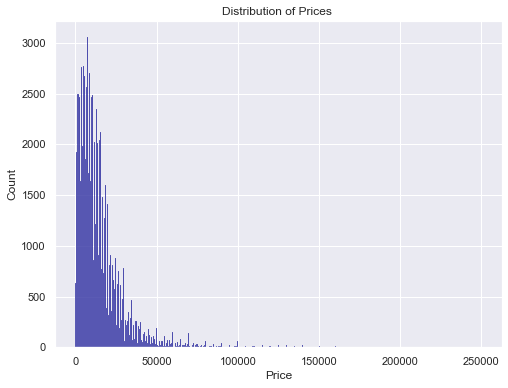

In [52]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
g = sns.histplot(x= "price",data=data,color = 'darkblue'
                         )
#g.set_xlim(0,15000)
plt.title("Distribution of Prices ");
plt.xlabel("Price");

In [53]:
data.price.mode()

0    6950
dtype: int64

The distribution of prices is not normal, It is right-skewed, most of the price value is ion the range of 0-5000, these price ranges consist of basic price

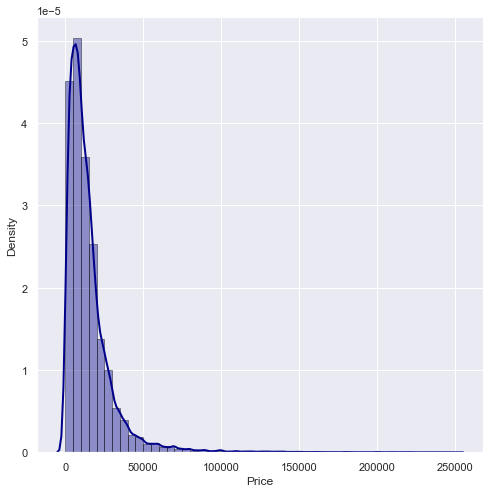

In [54]:
plt.figure(figsize=(8,8))
sns.distplot(data['price'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.xlabel("Price");

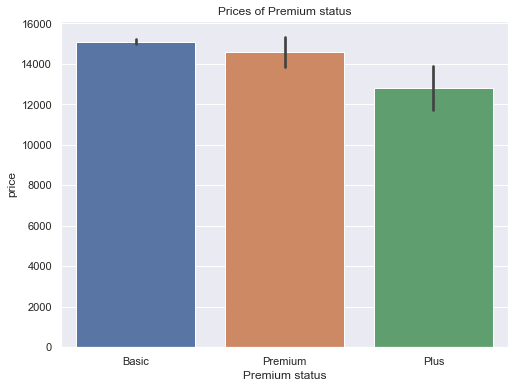

In [55]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.barplot(x= "product_tier",data=data,
                 y='price'
                         )
#g.set_xlim(0,15000)
plt.title("Prices of Premium status");
plt.xlabel("Premium status");

Above is a barplot show, the total price of different premium status. The price of Plus is usually very high compared to the basis, that is why the total product price of Basic and Plus doesn't show much difference even though, more than 95% of data is of Basic products. 



### Search Views

The search views column gives information about the number of times the article has been shown as a search result. So it gives an idea about how frequent users search for a particular product.



In [56]:
data.search_views.describe()

count    78320.000000
mean      1554.913164
std       1564.551371
min          0.000000
25%        367.000000
50%        920.000000
75%       2233.000000
max       5032.000000
Name: search_views, dtype: float64

The minimum of search views is 0, which means no searches and it ranges up to 5032 searches and a mean search of 1294.81

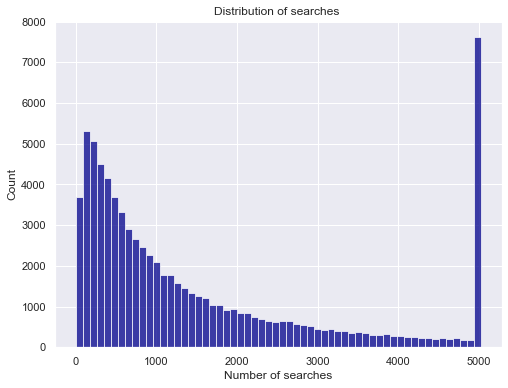

In [57]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
g = sns.histplot(x= "search_views",data=data,color = 'darkblue',
                 )
                         
#g.set_xlim(0,15000)
plt.title("Distribution of searches ")
#plt.ylim(0,3000)
plt.xlabel("Number of searches");

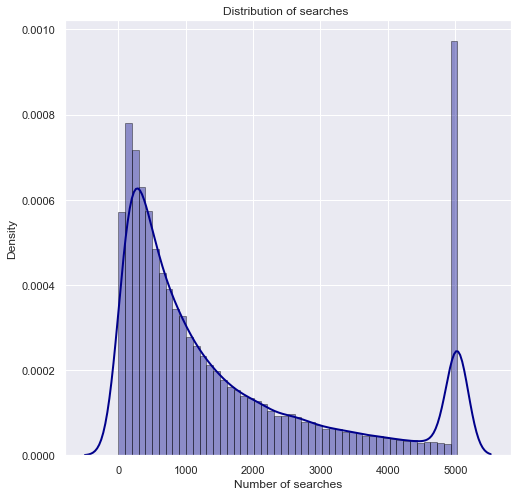

In [58]:
plt.figure(figsize=(8,8))
sns.distplot(data['search_views'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Distribution of searches ")
#plt.ylim(0,3000)
plt.xlabel("Number of searches");

The peak in the count at the end is due to all the replaced outliers. We replaced our outliers with 3rd quartile + 1.5* IQR, so all the outliers now have a single value. But the most number of searches ranges from 0 to 2000. We will scale this up to normal distribution later for modeling.

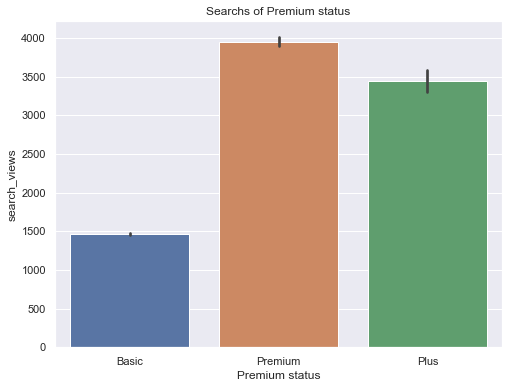

In [59]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.barplot(x= "product_tier",data=data,
                 y='search_views'
                         )
#g.set_xlim(0,15000)
plt.title("Searchs of Premium status");
plt.xlabel("Premium status");

Search for Premium status products are higher compared to other two and lower for basic.

### Detail Views
It is the number of times the article has been clicked on. So this gives the information on demand for particular article based on the number of clicks

In [60]:
data.detail_views.describe()

count    78320.000000
mean        93.459321
std        228.014609
min          0.000000
25%         13.000000
50%         36.000000
75%         94.000000
max      13926.000000
Name: detail_views, dtype: float64

The average number of clicks is 93 and maximum is 13926. So there is a large range of values in the column.

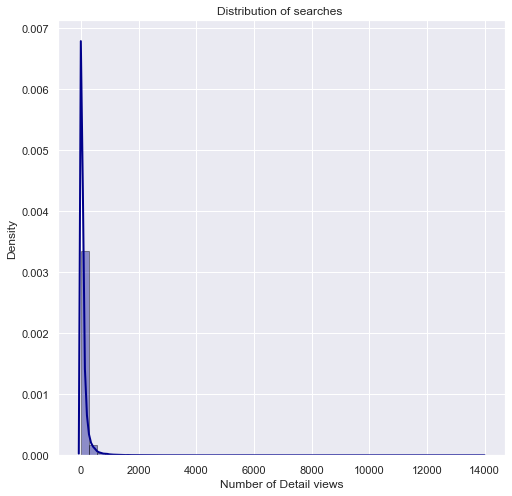

In [61]:
plt.figure(figsize=(8,8))
sns.distplot(data['detail_views'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Distribution of searches ")
#plt.ylim(0,3000)
plt.xlabel("Number of Detail views");

Since we didn't remove the outliers of this data, the density plot is highly skewed. It shows that most of the values are below 2000 and the values range from 0 to 14000.

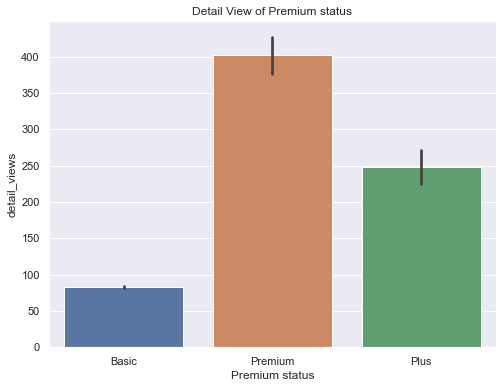

In [62]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.barplot(x= "product_tier",data=data,
                 y='detail_views'
                         )
#g.set_xlim(0,15000)
plt.title("Detail View of Premium status");
plt.xlabel("Premium status");

Like searches, the number of times the article has been clicked on is higher for premium status products and lower for basic products.

### Feature Engineering

In this section, we will do the one-hot encoding for the categorical variables for accurate data modeling.
Machine Learning & Deep Learning algorithms are highly dependent on the input data quality. If Data quality is not good, even high-performance algorithms are of no use. It’s as simple as

In [63]:

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[num_columns].skew()
skew_vals

price               4.176987
first_zip_digit     0.141147
search_views        1.165255
detail_views       16.495121
stock_days          0.989509
ctr                 0.854597
dtype: float64

In [64]:
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
detail_views  16.495121
price          4.176987
search_views   1.165255
stock_days     0.989509
ctr            0.854597

In [65]:
for col in skew_cols.index.values:
    if col == "detail_views":
        continue
    data[col] = data[col].apply(np.log1p)

In [66]:
cata_cols

['article_id',
 'product_tier',
 'make_name',
 'first_registration_year',
 'created_date',
 'deleted_date']

In [67]:
len(data.created_date.unique())

35

In [68]:
len(data.deleted_date.unique())

273

In [69]:
one_hot_encode_cols = ['make_name','first_registration_year',
 'created_date',
 'deleted_date']

In [70]:
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
data.describe().T

count       mean         std       min        25%  \
price                  78320.0   9.188373    0.992007  0.693147   8.657129   
first_zip_digit        78320.0   4.632086    2.354275  1.000000   3.000000   
search_views           78320.0   6.731892    1.257025  0.000000   5.908083   
detail_views           78320.0  93.459321  228.014609  0.000000  13.000000   
stock_days             78320.0   3.120940    1.121923  0.000000   2.397895   
...                        ...        ...         ...       ...        ...   
deleted_date_31.03.19  78320.0   0.000026    0.005053  0.000000   0.000000   
deleted_date_31.07.18  78320.0   0.004188    0.064579  0.000000   0.000000   
deleted_date_31.08.18  78320.0   0.005924    0.076742  0.000000   0.000000   
deleted_date_31.10.18  78320.0   0.007035    0.083581  0.000000   0.000000   
deleted_date_31.12.18  78320.0   0.002643    0.051342  0.000000   0.000000   

                             50%        75%           max  
price                   9.296931   9.846441     12.428772  
first_zip_digit         5.000000   7.000000      9.000000  
search_views            6.825460   7.711549      8.523772  
detail_views           36.000000  94.000000  13926.000000  
stock_days              3.258097   4.025352      4.816241  
...                          ...        ...           ...  
deleted_date_31.03.19   0.000000   0.000000      1.000000  
deleted_date_31.07.18   0.000000   0.000000      1.000000  
deleted_date_31.08.18   0.000000   0.000000      1.000000  
deleted_date_31.10.18   0.000000   0.000000      1.000000  
deleted_date_31.12.18   0.000000   0.000000      1.000000  

[487 rows x 8 columns]

In [71]:
#sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

## Data Modelling

After Understanding, Preprocessing, and exploration of our data, we are ready for modelling our data with a different algorithm.
Here we have two problems to address:

1. Is it possible to predict the product tier from the information given in the other columns?

To solve this problem we will try to classify the data based on product tier and train the data to predict correct Product premium status. We will deploy different classification algorithms and identifies the best algorithm suitable for this data based on evaluation metrics.

2. Is it possible to predict detailed views from the information given in the other columns?

This is a prediction problem and we will apply various regression models and predict the detail views with optimum accuracy.

The first problem we will be solving is to predict product premium status.

### Predicting Premium status
Our target variable for this problem is column 'Product_tier', we will label encode this for the ease of modeling.

In [73]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['product_tier'] = le.fit_transform(data.product_tier)
#data['product_tier'].sample(5)

In [74]:
data['product_tier']

0        0
1        0
2        0
3        0
4        0
        ..
78316    0
78317    0
78318    0
78319    0
78320    0
Name: product_tier, Length: 78320, dtype: int64

The size of the data is very large, totally contains 78320 rows. Modeling big data like this need more computational power. So for the easiness of modeling, I sampled 10% of the data randomly and will be using this data for further modeling.




In [78]:
data_sample = X=data.sample(frac=0.1, replace=False, random_state=1)

Then we scaled our data using MinMax scaling in which each value is subtracted by the minimum value of the respective feature and then divide by the range of original maximum and minimum of the same feature. It has a default range between [0,1].

In [79]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for column in [num_columns]:
    data_sample[column] = mm.fit_transform(data_sample[column])

In [80]:

# Alternatively, we could stratify the categories in the split, as was done previously
feature_columns = [x for x in data_sample.columns if x != 'product_tier']

X_train, X_test, y_train, y_test = train_test_split(data_sample[feature_columns], data_sample['product_tier'],
                 test_size=0.3, random_state=42)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5482, 488)
(2350, 488)
(5482,)
(2350,)


Using Label encoder, we encoded Basic as 0, Premium as 1, and Plus as 1. As we mentioned earlier our data is highly unbalanced based on this column. 96% of the values are Basic Products. So this imbalance will stop our model from accurate prediction. Even if we predict all the output as Basic we could get an accuracy of above 95% because of this imbalance. So we have to balance this data before modeling.
There are several statistical techniques for balancing data, here such as oversampling the minority class and downsampling the majority class. Since our training data contains a total of 54824 entries, here we will downsample our majority class.

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.





In [82]:
from imblearn.over_sampling import SMOTE#smote = SMOTE(ratio='minority')X_sm, y_sm = smote.fit_sample(X, y)

In [83]:
seed=100
k=3
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [84]:
y_sm.value_counts()

2    5275
1    5275
0    5275
Name: product_tier, dtype: int64

In [85]:
X_sm.shape

(15825, 488)

Using SMOTE, we oversampled the minority classed 'Plus' and 'Premium' of the training data set. So now we have equal proportion of all three classes.



 Now we will start to modelling the data.


### K nearest neighbors

The first algorithm we are going to deploy is the K nearest neighbor. The important parameter of this model is the number of nearest neighbors (K). The optimal value of k reduces the effect of the noise on the classification but makes boundaries between classes less distinct. The Elbow method helps to select the optimal number of clusters for KNN clustering. 
Here we will use cross-validation with K from 1 to 40, followed by the Elbow method to determine the optimum K value.



In [90]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_sm,y_sm)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test,average='weighted')
    f1_scores.append((k, round(f1_score(y_test, y_pred,average='weighted'), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])



<Figure size 72x72 with 0 Axes>

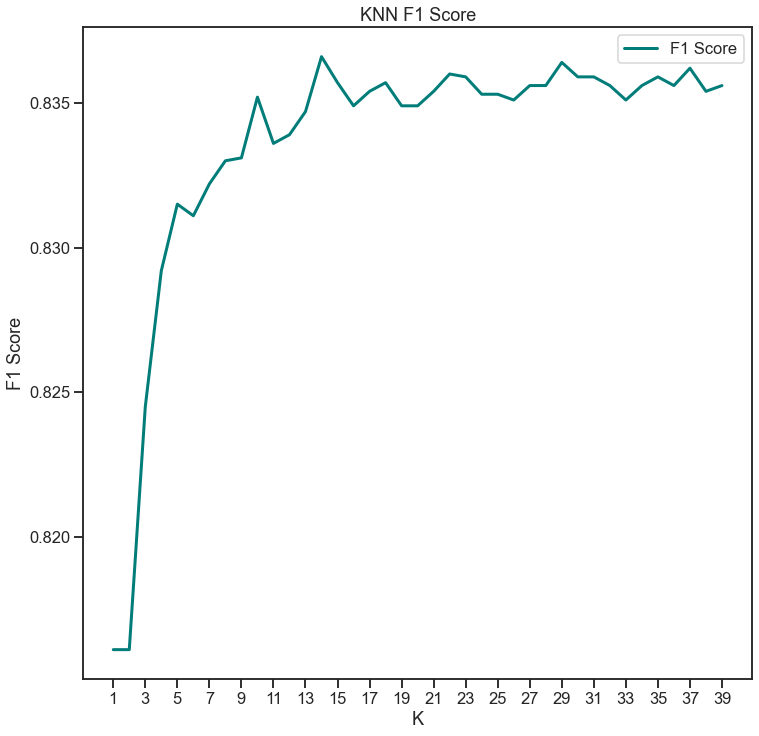

In [91]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(figsize=(1,1))
ax = f1_results.set_index('K').plot(color=colors[1], figsize=(12, 12), linewidth=3)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score');

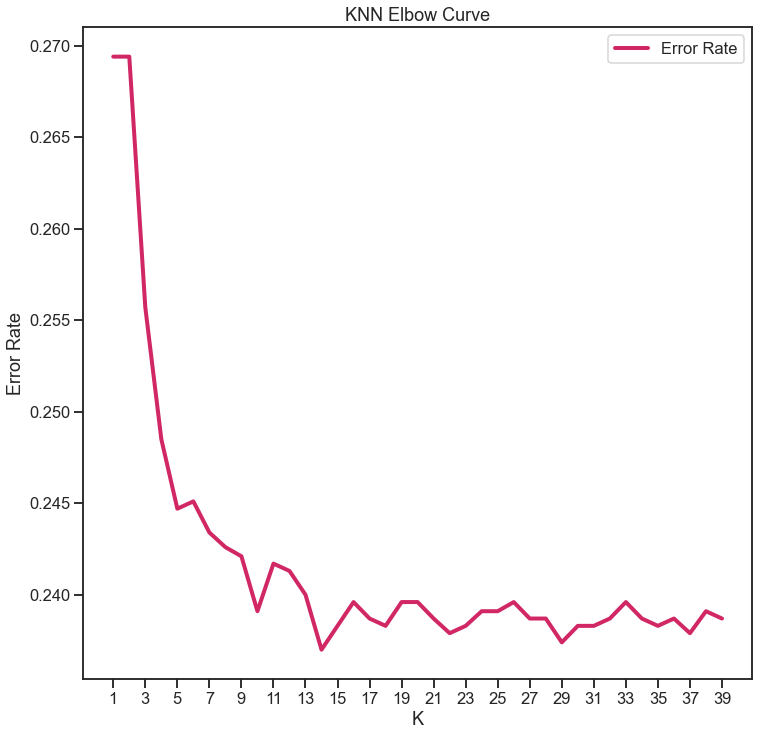

In [92]:
sns.set_style('ticks')
ax = error_results.set_index('K').plot(color=colors[2], figsize=(12, 12), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve');

We have to select the value of k at the “elbow” ie the point after which the inertia starts decreasing linearly. Thus from the above elbow plots for our data, we conclude that the optimal number of the neighbor is 14.

Now, we will deploy our KNN model with K of 14 and evaluate the performance.



In [93]:
knn = KNeighborsClassifier(n_neighbors=14, weights='distance')
knn = knn.fit(X_sm, y_sm)
y_pred_KNN = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred_KNN))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_KNN),
                         'precision': precision_score(y_test, y_pred_KNN,average='weighted'),
                         'recall': recall_score(y_test, y_pred_KNN,average='weighted'),
                         'f1': f1_score(y_test, y_pred_KNN,average='weighted')},
                         #'auc': roc_auc_score(y_test, y_pred_KNN,multi_class="ovu")},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

       Basic       0.97      0.78      0.87      2265
        Plus       0.02      0.17      0.04        18
     Premium       0.04      0.22      0.07        67

    accuracy                           0.76      2350
   macro avg       0.34      0.39      0.32      2350
weighted avg       0.93      0.76      0.84      2350

   accuracy  precision    recall        f1
0  0.762979   0.933109  0.762979  0.836555


In [102]:
score_df_KNN = pd.DataFrame({'model': 'KNN', 
                          'accuracy': 0.762979      ,
                         'precision':  0.933109 ,
                         'recall': 0.762979   ,
                         'f1': 0.836555},
                         
                         index=pd.Index([0]))

In [103]:
score_df_KNN

model  accuracy  precision    recall        f1
0   KNN  0.762979   0.933109  0.762979  0.836555

Text(40.5, 0.5, 'Ground Truth')

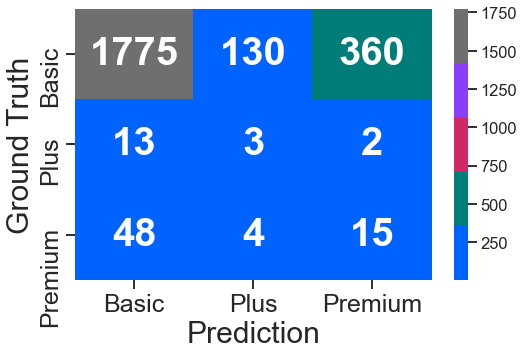

In [94]:
_, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Basic', 'Plus','Premium']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)

#### Evaluation metrices analysis

K nearest model with a K of 14 could give us a total accuracy of 76%, precision of 93%, and recall of 76%. The performance of this model on our data is not that bad. From the Confusion matrix and Score table we could usee that
1. For the Basic premium status model correctly predicted 1775 class from the total of  1836, so the true positive rate and precision are calculated to be 97%. Since our data is highly biased towards the Basic class, high accuracy and precision rate in the prediction of the basic class doesn't guarantee a good prediction of all the classes. 
2. The score table shows that the precision and recall for Premium and Plus class are very low, 2% and 4% respectively. This is the result of a small proportion of data for these classes.
3. Recall is comparatively better than precision. From all original Plus classes, our model predicts 17% as correct Plus and for Premium from all plus class, 22% predicted correctly.

Even though the overall performance of this model is appreciatable, there is still scope for improvement of our fitting. So we will try to fit other models and as a next step, we deploy the 'Random Forest' model to our data.

### Random Forest

The random forest is a powerful classification algorithm based on the ensemble method. It combines multiple algorithms of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

This algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced also it is a very stable model.

Here we try the different number of trees and find out the best parameter with the out-of-bag error, where the average error for each number of trees is calculated. We used three numbers from 15 to 400 and plotted the out-of-bag error with the tree number.

In [124]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=False,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_sm, y_sm)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

|   n_trees |       oob |
|----------:|----------:|
|        15 | 0.0221169 |
|        20 | 0.0180095 |
|        30 | 0.0149763 |
|        40 | 0.0135861 |
|        50 | 0.0127014 |
|       100 | 0.0114376 |
|       150 | 0.0104265 |
|       200 | 0.0110585 |
|       300 | 0.0103633 |
|       400 | 0.0103633 |


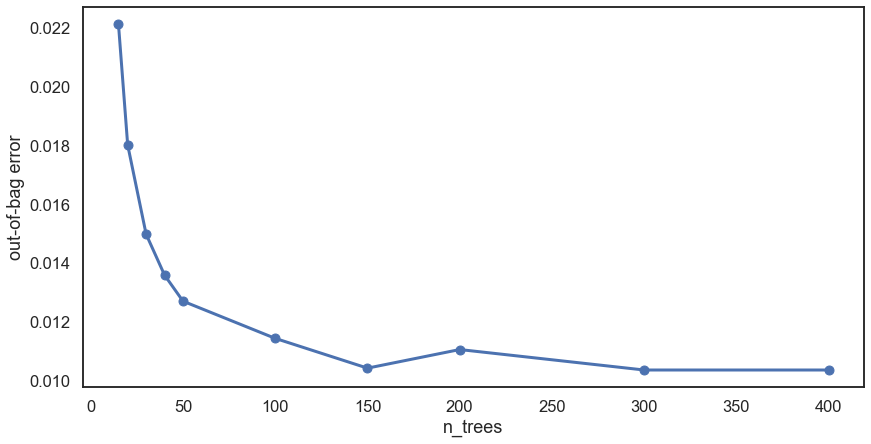

In [125]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=3)
ax.set(ylabel='out-of-bag error');

The above plotted the errors for a model with a number of trees ranges from 15 to 400.

The error looks like to stabilizes around tree number 150. So we will apply a random forest with 200 trees for the prediction of the premium status of the product.

In [146]:
RF=RF.set_params(n_estimators=150)
RF.fit(X_sm,y_sm)
y_pred_RF = RF.predict(X_test)

In [147]:
cr = classification_report(y_test, y_pred_RF)    
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_RF),
                         'precision': precision_score(y_test, y_pred_RF,average='weighted'),
                         'recall': recall_score(y_test, y_pred_RF,average='weighted'),
                         'f1': f1_score(y_test, y_pred_RF,average='weighted')},
                         #'auc': roc_auc_score(y_test, y_pred_KNN,multi_class="ovu")},
                         index=pd.Index([0]))

print(score_df)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2265
           1       0.00      0.00      0.00        18
           2       0.32      0.18      0.23        67

    accuracy                           0.96      2350
   macro avg       0.43      0.39      0.40      2350
weighted avg       0.94      0.96      0.95      2350

   accuracy  precision    recall        f1
0  0.958298   0.943061  0.958298  0.949983


In [100]:
score_df_RF = pd.DataFrame({'model': 'Random Forest', 
                          'accuracy': 0.958298   ,
                         'precision':  0.943061 ,
                         'recall': 0.958298   ,
                         'f1': 0.949983},
                         
                         index=pd.Index([0]))

In [101]:
score_df_RF

model  accuracy  precision    recall        f1
0  Random Forest  0.958298   0.943061  0.958298  0.949983

Text(58.5, 0.5, 'Ground Truth')

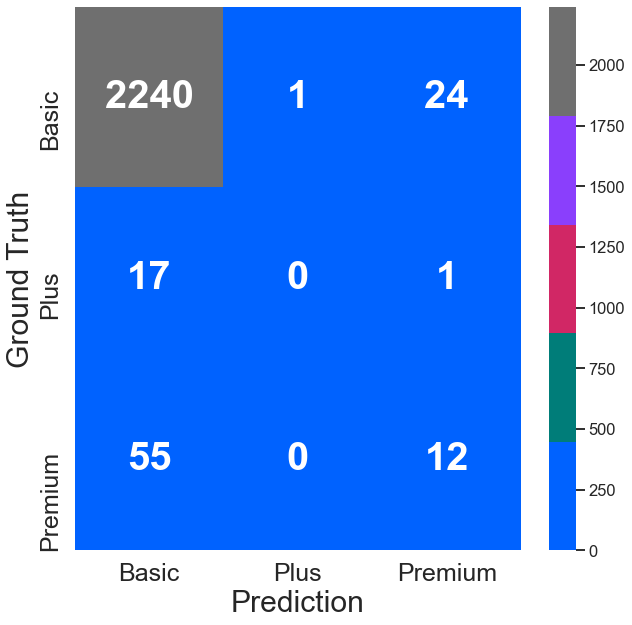

In [149]:
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['Basic', 'Plus','Premium']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)

In [144]:
y_test.value_counts()

0    2265
2      67
1      18
Name: product_tier, dtype: int64

#### Evaluation metrices analysis

Random Forest model with a number of trees of 150 could give us a weighted accuracy of 94%, precision of 96%, and recall of 95%. The performance of this model is better than that of the KNN model as expected.
But if we look into the confusion metrics of our model we can see that,
1. Our model could not predict any value belongs to the Plus class, so the precision, recall, and F1 score for this prediction zero. I believe this happened due to the very small proportion of the Plus class(only 0.7%) present in the validation data.
2. The prediction of Premium Class is better compared to KNN. Even though the Premium class consists of 2% of test data, it could correctly predict it with 0.32 precision,0.18 recall, and 0.23 F1 score. 

Even though the performance of this model is better than KNN, we could not rely on this because of the failure of correct prediction of Plus classes. 

As a next step, we deploy Gradient Boosting and check any improvement in the model performance.

### Gradient Boosting

In Boosting algorithms each new tree is a fit on a modified version of the original data set. Gradient Boosting trains many decision tree models in a gradual, additive, and sequential manner. gradient boosting outcomes the shortcomings of decision tree performs by using gradients in the loss function.
Instead of using random values for hyperparameter for prediction, we use the GridSearchCV cross-validation method to find out the optimum hyperparameters.






In [151]:
tree_list = [15, 25, 50, 100, 200, 400]

In [ ]:
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      )

# Do the grid search
GV_GBC = GV_GBC.fit(X_sm,y_sm)

In [153]:
import pickle
pickle.dump(GV_GBC,open('GV_GBC.p','wb'))
GV_GBC = pickle.load(open('GV_GBC.p','rb'))

In [76]:
import pickle
GV_GBC = pickle.load(open('GV_GBC.p','rb'))
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42)

In [96]:
y_pred_GBC = GV_GBC.predict(X_test)
print(classification_report(y_pred_GBC, y_test))

score_df_GBC = pd.DataFrame({'model' : 'Gradient Boosting',
                          'accuracy': accuracy_score(y_test, y_pred_GBC),
                         'precision': precision_score(y_test, y_pred_GBC,average='weighted'),
                         'recall': recall_score(y_test, y_pred_GBC,average='weighted'),
                         'f1': f1_score(y_test, y_pred_GBC,average='weighted')},
                         
                         index=pd.Index([0]))

print(score_df_GBC)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2244
           1       0.00      0.00      0.00        40
           2       0.19      0.20      0.20        66

    accuracy                           0.93      2350
   macro avg       0.39      0.39      0.39      2350
weighted avg       0.92      0.93      0.93      2350

               model  accuracy  precision    recall        f1
0  Gradient Boosting  0.932766   0.941527  0.932766  0.937126


In [97]:
score_df_GBC

model  accuracy  precision    recall        f1
0  Gradient Boosting  0.932766   0.941527  0.932766  0.937126

Text(40.5, 0.5, 'Ground Truth')

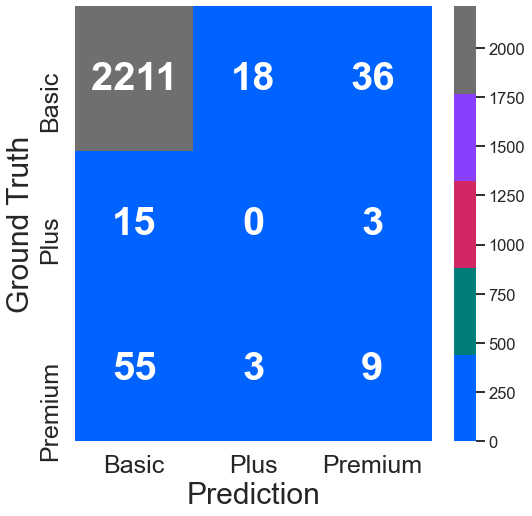

In [163]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_GBC)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['Basic', 'Plus','Premium']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)

#### Evaluation Metrics Analysis

This model also failed to predict the Plus class, the precision, recall score and F1 score are very less. So we will try the AdaBoosting model now.

###  AdaBoosting
The AdaBoost algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree.

Here also, we did cross-validation for choosing the optimum hyperparameter.

In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_sm, y_sm)

In [149]:
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=200)

In [151]:
y_pred_ABC = GV_ABC.predict(X_test)
print(classification_report(y_pred, y_test))

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred_ABC),
                         'precision': precision_score(y_test, y_pred_ABC,average='weighted'),
                         'recall': recall_score(y_test, y_pred_ABC,average='weighted'),
                         'f1': f1_score(y_test, y_pred_ABC,average='weighted')},
                         
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1642
           1       0.56      0.02      0.04       506
           2       0.43      0.14      0.22       202

    accuracy                           0.71      2350
   macro avg       0.57      0.38      0.36      2350
weighted avg       0.66      0.71      0.61      2350

   accuracy  precision    recall        f1
0  0.706809   0.956335  0.706809  0.806712


In [116]:
score_df_ABC = pd.DataFrame({'model': 'AdaBoost' ,
                          'accuracy': 0.706809,
                         'precision':  0.956335,
                         'recall': 0.706809 ,
                         'f1': 0.806712},
                         
                         index=pd.Index([0]))

In [118]:
score_df_ABC

model  accuracy  precision    recall        f1
0  AdaBoost  0.706809   0.956335  0.706809  0.806712

In [153]:
pickle.dump(GV_ABC,open('GV_ABC.p','wb'))
GV_ABC = pickle.load(open('GV_ABC.p','rb'))

Text(40.5, 0.5, 'Ground Truth')

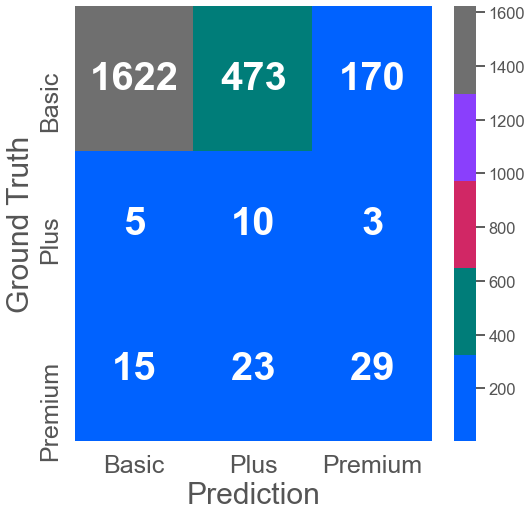

In [154]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred_ABC)
_, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['Basic', 'Plus','Premium']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_xlabel('Prediction', fontsize=30);
ax.set_ylabel('Ground Truth', fontsize=30)

#### Evaluation metric analysis


The performance of this model is very much better than Gradient boosting. Like the other model, it not only predicted Basic and Premium classes but also the Plus class.
The precision of the prediction of the Plus class is 0.95, which is so far the best precision value we got. It correctly predicted 10 plus class out of 18.
The total average weighted precision is 0.956335, recall is 0.706809 and F1 score is 0.806712. Since our data was highly imbalanced, the correct metrics of evaluation is precision, accuracy would not give precise information about the fitting of the model. So we could say Adaboost fitted the data very well based on the high precision value.

## Analysis

This section dealt with predicting the Premium status of the products in the data set, whether it is a Basic, Premium, or Plus product. In order to classify the data into one of three classes, we deployed classification models like K nearest neighbor, Random Forest, Gradient Boosting, and AdaBoosting.
The summary of the evaluation metrics of these models is given below:

In [119]:
model_performances = pd.concat([score_df_KNN,score_df_RF,score_df_GBC,score_df_ABC],axis = 0).reset_index()

In [120]:
model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

From the careful examination of the evaluation metrics of these models, the weighted average precision for AdaBoost is the highest. Implies this model could correctly differentiate all three classes in 95% of the cases. The accuracy for Random Forest and Gradient Boosting is very high, but from the Confusion matrix of these models we could notice, these models failed to predict the 'Plus class'. So High evaluation metrics of these model, is the result of data imabalnce in our data. The K nearest neighbor fitted our model well with, a K number of 14. Overall AdaBoost models performed well on our data. 

## Predict detailed views 

In this section, we will try to predict detailed views from the information given in the other columns. The detail views column gives information about the number of times the article has been clicked on. So it tells us the demand for the product.
For predicting the number of clicks on the article, first split the data set to a train and test set for validation purpose and then deploy various regression models and find out the best model which could predict with optimum accuracy.



In [123]:
type(data.detail_views)

pandas.core.series.Series

In [124]:
data.shape

(78320, 489)

Deploying algorithms on this big data would be a computational problem, so selected a sample randomly from the data which has a size of 10% of original data.

In [125]:
data_sample_pre = X=data.sample(frac=0.1, replace=False, random_state=1)

In [126]:
data_sample_pre.shape

(7832, 489)

In [127]:

feature_columns = [x for x in data_sample_pre.columns if x != 'detail_views']
X_= data_sample_pre[feature_columns]
Y_ = data_sample_pre.detail_views
# First converting the Features into Dictionary
X_ = X_.to_dict(orient='records')



Then divided data to train and test set for validating models. 

In [128]:
from sklearn.feature_extraction import DictVectorizer

#Importing vectorizer to convert Dictionary to array

vec = DictVectorizer()
X_= vec.fit_transform(X_).toarray()

#converting our target variable into array
Y_ = np.asarray(Y_)

In [129]:
Y_

array([ 22.,  97.,  19., ..., 360., 148., 163.])

In [130]:
s = StandardScaler()
xtrain, xtest, ytrain, ytest = train_test_split(X_,Y_, test_size=0.3, random_state=42)
X_train_s = s.fit_transform(xtrain)

X_test_s = s.fit_transform(xtest)

In [131]:
ytrain

array([  4., 139., 106., ...,  22.,  43.,  26.])

We preprocessed data for regression models. Downsampled to a small dataset and divided it into a train and test set. Now we will deploy various regression models on our data.


### Linear Regression
The very first model we deploy is the simple linear regression model.


In [134]:

lr = LinearRegression()
lr.fit(X_train_s,ytrain)
lr_prediction=lr.predict(X_test_s)


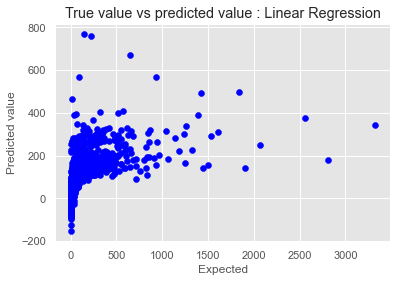

In [135]:
plt.style.use('ggplot')
plt.scatter(ytest, lr_prediction, c = 'blue') 
plt.xlabel("Expected") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

In [136]:
from sklearn import metrics

print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, lr_prediction))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, lr_prediction))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, lr_prediction)))
from sklearn.metrics import r2_score
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,lr_prediction))

Mean Squared Error is: 28987.031635662963
Mean Absolute Error is: 71.7591328323284
Root Mean Squared Error is: 170.25578297274652
The R2 value is: 0.2628065057791029


We evaluate the metrics using Mean squared Error(MSE), Mean Absolute Erroe and R^2 Value. So from evaliuation metrices, the model performs well but we will introduce regularization terms to our regression to oavaoid overfitiing.

### Ridge Regression

The second model we will be using is ridge regression. We used GridSearchCV for finding the best alpha parameter for the prediction.

In [157]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5);
ridge_regressor.fit(X_train_s,ytrain);



In [158]:
y_pred_ridge=ridge_regressor.predict(X_test_s)

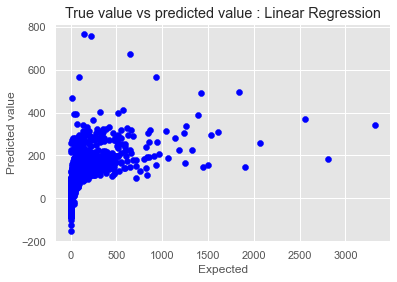

In [159]:
plt.style.use('ggplot')
plt.scatter(ytest, y_pred_ridge, c = 'blue') 
plt.xlabel("Expected") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

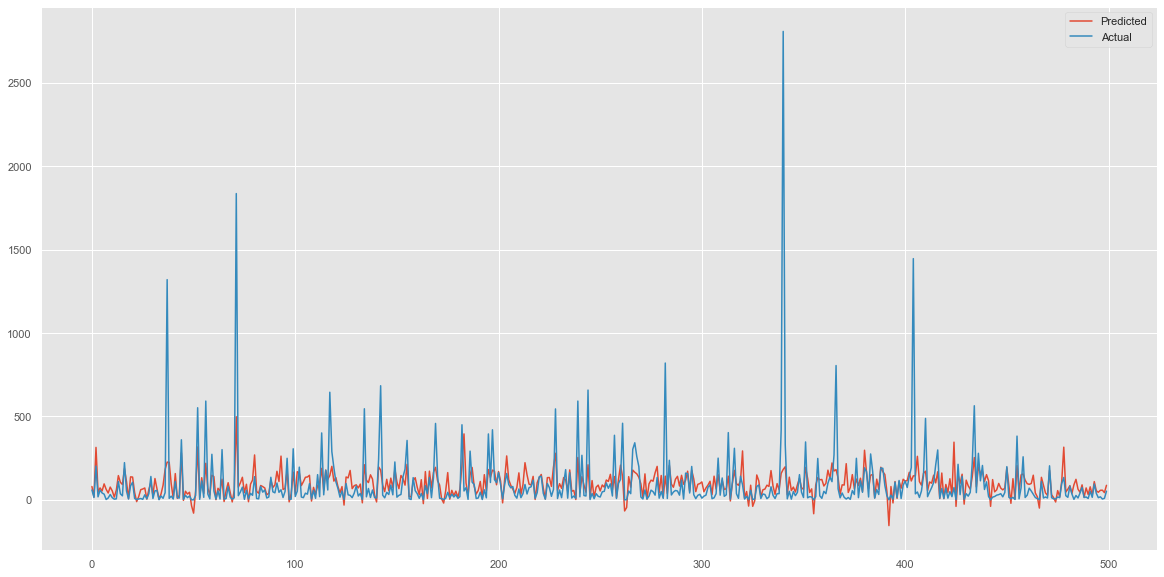

In [160]:
plt.figure(figsize=(20,10))
plt.plot(y_pred_ridge[:500])
plt.plot(ytest[:500])
plt.legend(["Predicted","Actual"])
plt.show()

In [161]:
y_pred_ridge = ridge_regressor.predict(X_test_s)
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, y_pred_ridge))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, y_pred_ridge))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, y_pred_ridge)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,y_pred_ridge))

Mean Squared Error is: 28974.689887188928
Mean Absolute Error is: 71.73414752362841
Root Mean Squared Error is: 170.21953438776916
The R2 value is: 0.26312037912759634


### Lasso Regression
After the ridge regression, the lasso regression has been carried out. Like the ridge, using GridSearchCV, the cross-validation for the alpha parameter has been carried out. The best alpha value was found to be 'alpha= 40'.
The plot below shows the variation of predicted values from the actual values:

In [162]:
lasso = Lasso(max_iter=100000)
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5);

lasso_regressor.fit(X_train_s,ytrain);



In [163]:
lasso_predict= lasso_regressor.predict(X_test_s)

In [164]:
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, lasso_predict))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, lasso_predict))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, lasso_predict)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,lasso_predict))



Mean Squared Error is: 28127.866628180895
Mean Absolute Error is: 70.73785910255496
Root Mean Squared Error is: 167.71364472868896
The R2 value is: 0.28465665111094807


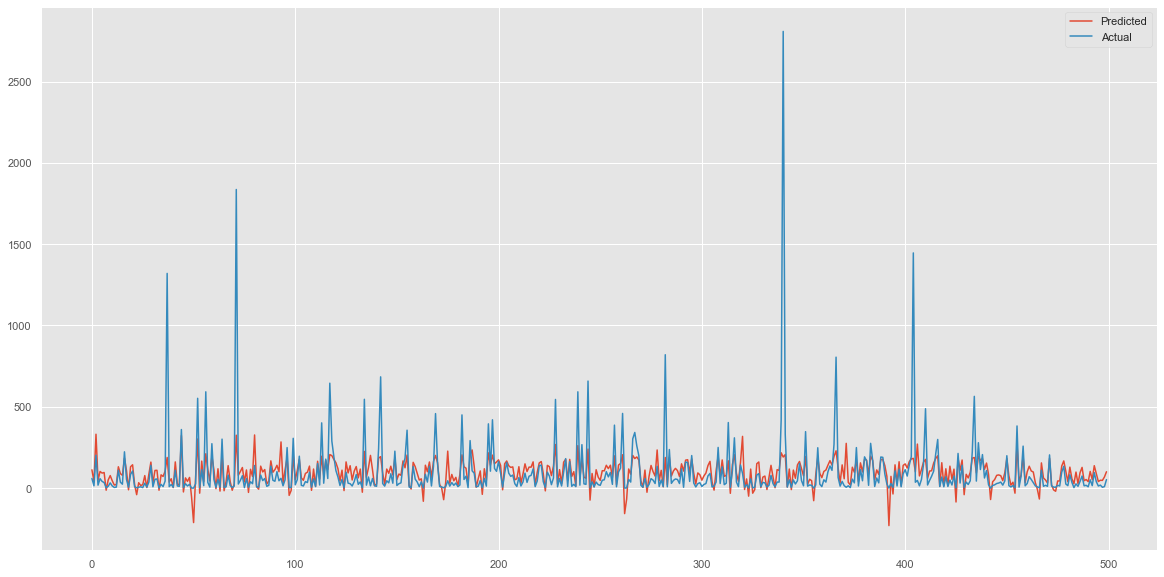

In [165]:
plt.figure(figsize=(20,10))
plt.plot(lasso_predict[:500])
plt.plot(ytest[:500])
plt.legend(["Predicted","Actual"])
plt.show()

### Elastic Net Regression

Apart from ridge and lasso, the Elastic net regression was also carried out and the metrics of the predictions have been calculated. 

The plot showing the relation for elastic net regression is shown below:

In [166]:
el_net = ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
el_regressor = GridSearchCV(el_net, parameters, scoring='r2', cv=5);
el_regressor.fit(X_train_s,ytrain);



In [167]:
el_predict= el_regressor.predict(X_test_s)

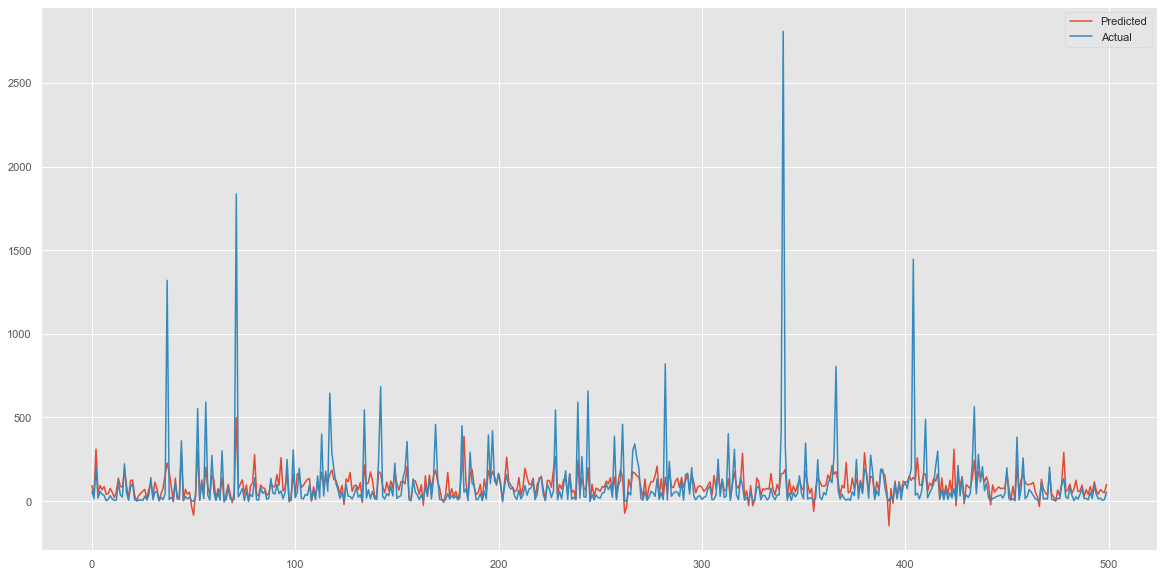

In [168]:
plt.figure(figsize=(20,10))
plt.plot(el_predict[:500])
plt.plot(ytest[:500])
plt.legend(["Predicted","Actual"])
plt.show()

In [169]:
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest, el_predict))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, el_predict))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, el_predict)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,el_predict))




Mean Squared Error is: 28845.6800552144
Mean Absolute Error is: 70.3442062685826
Root Mean Squared Error is: 169.84016031320272
The R2 value is: 0.2664013362817308


#### Regression evaluation metrics analysis

So to predict detail views we deployed simple linear regression, ridge, lasso, and elastic net regression. Since our target column contains outliers, The Mean Squared Error is the appropriate evaluation metrics here. So the value of  MEan squared error is the least for the lasso regression. From all the regression analysis lasso performed better. 
The visualization of the predicted and original data shows that all the models predicted almost similar to the original values except for the outlier values.





In [170]:

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    #accuracy     = accuracy_score(testing_y,predictions)
    mean_sq_err  = metrics.mean_squared_error(testing_y,predictions)
    mean_abs_err = metrics.mean_absolute_error(testing_y,predictions)
    Rmean_sq_err = np.sqrt(metrics.mean_squared_error(testing_y,predictions) )
    r2_score     = metrics.r2_score(testing_y,predictions)
    df = pd.DataFrame({"Model"                  : [name],
                       "Mean Square Error"      : [mean_sq_err],
                       "Mean Absolute Error"    : [mean_abs_err],
                       "Root Mean Square Error" : [Rmean_sq_err],
                       "R2 score" : [r2_score]
                       
                      })
    return df

model1 = model_report(lr,X_train_s,X_test_s,ytrain,ytest,
                      "Linear Regression")

model2 = model_report(ridge_regressor,X_train_s,X_test_s,ytrain,ytest,
                      "Ridge Regression")

model3 = model_report(lasso_regressor,X_train_s,X_test_s,ytrain,ytest,
                      "Lasso Regression")

model4 = model_report(el_regressor,X_train_s,X_test_s,ytrain,ytest,
                      "Elastic Net Regression")


model_performances = pd.concat([model1,model2,model3,model4],axis = 0).reset_index()
model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

### Decision Tree regression

In this section, we apply Decision Tree regression and predicts the number of clicks.
Decision trees regression use mean squared error (MSE) to decide to split a node into two or more sub-nodes. 

In [363]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor()
dr.fit(X_train_s, ytrain)


DecisionTreeRegressor()

In [364]:
Y_pred_DT = regressor.predict(X_test_s)

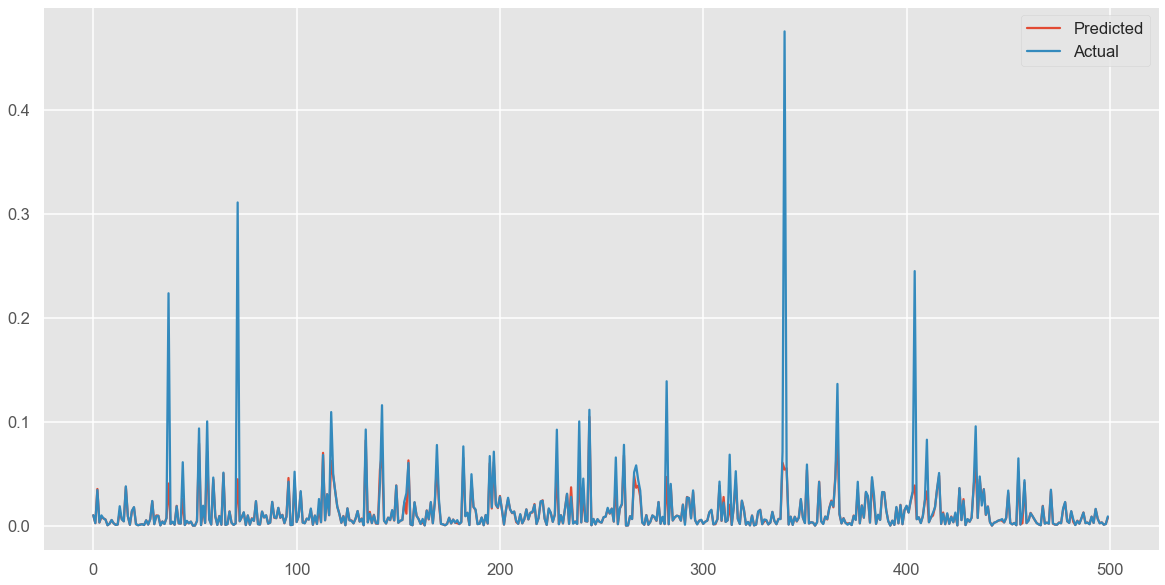

In [432]:
plt.figure(figsize=(20,10))
plt.plot(Y_pred_DT[:500])
plt.plot(ytest[:500])
plt.legend(["Predicted","Actual"])
plt.show()

In [365]:
print('\033[1mMean Squared Error is:\033[0m', metrics.mean_squared_error(ytest,Y_pred_DT))  
print('\033[1mMean Absolute Error is:\033[0m', metrics.mean_absolute_error(ytest, Y_pred_DT))  
print('\033[1mRoot Mean Squared Error is:\033[0m', np.sqrt(metrics.mean_squared_error(ytest, Y_pred_DT)))
print('\033[1mThe R2 value is:\033[0m',r2_score(ytest,Y_pred_DT))




Mean Squared Error is: 0.0006293853575935328
Mean Absolute Error is: 0.0042236292996979
Root Mean Squared Error is: 0.025087553838378362
The R2 value is: 0.44111511494604405


The mean square error of the prediction model is very much better than the linear regression model. From the plot, we can see that the difference between the actual and predicted values are not that large. 

### Deep learning regression

In this section we created a nueral network for correctly predicting the deatil view of the product.

In [148]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline



import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

We used a sample with 10% of the original data for analysis due to the bog size of the original data we have.
One of the most important considerations when training a neural network is choosing the number of neurons to include in the input and hidden layers.
So for the input layer, we inserted the number of features of the data plus a bias layer, a total of 490 layers. Add a hidden layer with the number of layers of 24 and an output layer with only one 1 layer.



In [138]:
data_sample_NN = X=data.sample(frac=0.1, replace=False, random_state=1)

In [139]:
one_hot_encode_cols = ['product_tier']
data_sample_NN = pd.get_dummies(data_sample_NN, columns=one_hot_encode_cols, drop_first=True)


In [140]:

feature_columns = [x for x in data_sample_NN.columns if x != 'detail_views']
X_= data_sample_NN[feature_columns]
Y_ = data_sample_NN.detail_views

In [141]:
Y_ = np.array(Y_)

In [142]:
X_train, X_val, y_train, y_val = train_test_split(X_, Y_)

In [143]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [144]:
X_train.shape[1]

489

In [145]:
X_train.shape[1]

489

In [146]:
X_train.shape[0]

5874

In [149]:
model = Sequential()
model.add(Dense(490, input_dim=489, kernel_initializer='normal', activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 490)               240100    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                11784     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 251,909
Trainable params: 251,909
Non-trainable params: 0
_________________________________________________________________


In [150]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.3)
predictions = model.predict(xval_scale)

Epoch 1/30
28/28 [==============================] - 1s 32ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0428 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0180
Epoch 2/30
28/28 [==============================] - 0s 9ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0153 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0158
Epoch 3/30
28/28 [==============================] - 0s 10ms/step - loss: 6.3247e-04 - mse: 6.3247e-04 - mae: 0.0115 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0151
Epoch 4/30
28/28 [==============================] - 0s 10ms/step - loss: 6.1481e-04 - mse: 6.1481e-04 - mae: 0.0104 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0147
Epoch 5/30
28/28 [==============================] - 0s 11ms/step - loss: 4.3083e-04 - mse: 4.3083e-04 - mae: 0.0085 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0148
Epoch 6/30
28/28 [==============================] - 0s 13ms/step - loss: 2.3241e-04 - mse: 2.3241e-04 - mae: 0.0069 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae

In [152]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[-3.866825],
       [ 9.765643],
       [29.977009],
       ...,
       [13.553954],
       [15.975434],
       [25.828897]], dtype=float32)

In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean absolute error is:',mean_absolute_error(y_val,predictions))
print('Mean squared error is:',mean_squared_error(y_val,predictions))

Mean absolute error is: 62.1311656995177
Mean squared error is: 28504.96078868323


Trained the neural network with 30 epoch and 150 batch sizes. The error metrics we got from this model are given below. The Mean absolute error is far better than simple regression methods.
Now increased the epoch size to 100, to check any improvement in the error matrics.

In [154]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=100, batch_size=150, verbose=1, validation_split=0.3)
predictions = model.predict(xval_scale)

Epoch 1/100
28/28 [==============================] - 1s 13ms/step - loss: 7.7730e-05 - mse: 7.7730e-05 - mae: 0.0055 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0130
Epoch 2/100
28/28 [==============================] - 0s 8ms/step - loss: 9.4211e-05 - mse: 9.4211e-05 - mae: 0.0048 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0122
Epoch 3/100
28/28 [==============================] - 0s 10ms/step - loss: 6.3257e-05 - mse: 6.3257e-05 - mae: 0.0041 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0123
Epoch 4/100
28/28 [==============================] - 0s 10ms/step - loss: 6.8688e-05 - mse: 6.8688e-05 - mae: 0.0040 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0117
Epoch 5/100
28/28 [==============================] - 0s 11ms/step - loss: 4.9368e-05 - mse: 4.9368e-05 - mae: 0.0035 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0117
Epoch 6/100
28/28 [==============================] - 0s 11ms/step - loss: 4.0492e-05 - mse: 4.0492e-05 - mae: 0.0033 - val_loss: 0.0012 - val

28/28 [==============================] - 0s 9ms/step - loss: 1.9717e-05 - mse: 1.9717e-05 - mae: 0.0018 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0107
Epoch 49/100
28/28 [==============================] - 1s 20ms/step - loss: 1.8977e-05 - mse: 1.8977e-05 - mae: 0.0019 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0108
Epoch 50/100
28/28 [==============================] - 0s 11ms/step - loss: 1.7780e-05 - mse: 1.7780e-05 - mae: 0.0016 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0108
Epoch 51/100
28/28 [==============================] - 0s 13ms/step - loss: 1.5322e-05 - mse: 1.5322e-05 - mae: 0.0017 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0104
Epoch 52/100
28/28 [==============================] - 0s 10ms/step - loss: 1.1077e-05 - mse: 1.1077e-05 - mae: 0.0015 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0105
Epoch 53/100
28/28 [==============================] - 0s 9ms/step - loss: 1.5431e-05 - mse: 1.5431e-05 - mae: 0.0018 - val_loss: 0.0011 - val_mse: 0.

28/28 [==============================] - 0s 8ms/step - loss: 1.4266e-06 - mse: 1.4266e-06 - mae: 6.1832e-04 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0106
Epoch 96/100
28/28 [==============================] - 0s 11ms/step - loss: 1.3459e-06 - mse: 1.3459e-06 - mae: 5.3232e-04 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0105
Epoch 97/100
28/28 [==============================] - 0s 8ms/step - loss: 1.3683e-06 - mse: 1.3683e-06 - mae: 5.6071e-04 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0106
Epoch 98/100
28/28 [==============================] - 0s 11ms/step - loss: 2.0181e-06 - mse: 2.0181e-06 - mae: 5.6232e-04 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0106
Epoch 99/100
28/28 [==============================] - 0s 12ms/step - loss: 1.8612e-06 - mse: 1.8612e-06 - mae: 5.1545e-04 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0106
Epoch 100/100
28/28 [==============================] - 0s 13ms/step - loss: 2.9015e-06 - mse: 2.9015e-06 - mae: 8.1112e-04 - val_l

In [334]:
predictions_100 = scaler_y.inverse_transform(predictions)
predictions_100

array([[210.59299  ],
       [  8.3681965],
       [164.08835  ],
       ...,
       [  8.3681965],
       [ 37.538624 ],
       [  8.3681965]], dtype=float32)

In [335]:
print('Mean absolute error is:',mean_absolute_error(y_val,predictions_100))
print('Mean squared error is:',mean_squared_error(y_val,predictions_100))

Mean absolute error is: 50.05609369757409
Mean squared error is: 24670.694310981227


The Mean absolute error is improved to 50, when we increased the epoch.

So far we used 'relu' activation function, now we try 'elu' activation function and calculates the Mean absolute error.

In [338]:
model = Sequential()
model.add(Dense(490, input_dim=489, kernel_initializer='normal', activation='elu'))
model.add(Dense(24, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 490)               240100    
_________________________________________________________________
dense_75 (Dense)             (None, 24)                11784     
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 25        
Total params: 251,909
Trainable params: 251,909
Non-trainable params: 0
_________________________________________________________________


In [339]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=100, batch_size=150, verbose=1, validation_split=0.3)
predictions = model.predict(xval_scale)

Epoch 1/100
55/55 [==============================] - 1s 11ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1139 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0294
Epoch 2/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0242 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0228
Epoch 3/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0210 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0226
Epoch 4/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0208 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0218
Epoch 5/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0210 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0211
Epoch 6/100
55/55 [==============================] - 0s 7ms/step - loss: 9.0631e-04 - mse: 9.0631e-04 - mae: 0.0183 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0224
Epoch 7/100
5

Epoch 49/100
55/55 [==============================] - 1s 13ms/step - loss: 1.7336e-04 - mse: 1.7336e-04 - mae: 0.0095 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0177
Epoch 50/100
55/55 [==============================] - 1s 13ms/step - loss: 1.6923e-04 - mse: 1.6923e-04 - mae: 0.0095 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0178
Epoch 51/100
55/55 [==============================] - 1s 20ms/step - loss: 1.5160e-04 - mse: 1.5160e-04 - mae: 0.0087 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0178
Epoch 52/100
55/55 [==============================] - 1s 18ms/step - loss: 1.4877e-04 - mse: 1.4877e-04 - mae: 0.0088 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0192
Epoch 53/100
55/55 [==============================] - 1s 10ms/step - loss: 1.8152e-04 - mse: 1.8152e-04 - mae: 0.0095 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0180
Epoch 54/100
55/55 [==============================] - 0s 9ms/step - loss: 1.4175e-04 - mse: 1.4175e-04 - mae: 0.0085 - val_loss: 0.0014

In [155]:
predictions_elu = scaler_y.inverse_transform(predictions)
predictions_elu

array([[ 5.164772 ],
       [ 7.0498004],
       [12.300984 ],
       ...,
       [18.27642  ],
       [15.30745  ],
       [36.62004  ]], dtype=float32)

In [156]:
print('Mean absolute error is:',mean_absolute_error(y_val,predictions_elu))
print('Mean squared error is:',mean_squared_error(y_val,predictions_elu))

Mean absolute error is: 53.05245672343099
Mean squared error is: 27489.99423759831


The Neural network with 'elu' activation function didn't reduce our error. So 'relu ' activation function is better for our data.

## Analysis
The goal of this section was to correctly predict the 'detail_view'  of the product. From correctly predicting this feature, we could understand the demand for the product, and that way one could improve product features.
Here we deployed, simple linear, lasso, ridge and elastic regression, Decision tree Regression, and constructed neural networking for prediction. The Summary of the Mean absolute error of this model is given below.

In [177]:
# df = pd.DataFrame({"Model"                  : [name],
#                        "Mean Square Error"      : [mean_sq_err],
#                        "Mean Absolute Error"    : [mean_abs_err],
#                        "Root Mean Square Error" : [Rmean_sq_err],
#                        "R2 score" : [r2_score]
                       
#                       })
#     return df


performance_prediction = pd.DataFrame({'Model': ['Linear Regression',
                                              'Lasso',
                                              'Ridge',
                                             'Elastic',
                                             'Decision Tree',
                                            'Neural_network_300_epoch',
                                            'Neural_network_100_epoch',
                                            'Neural_network_elu'],
                                      'Mean absolute error' : [28987.03,28974.68,28127.86,28845.680,0.00062,62.13,50.05,53.05] })

#performance_prediction = performance_prediction.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(performance_prediction,4))

py.iplot(table)

The Summary table above shows that the decision tree classifier clearly performed very well. Since the detail view column has outliers, we chose Mean absolute error(MAE) matrics for evaluation. The MAE of the Decision tree is very less compared to others. The simple regression models could not perform very well on our data. The neural network performed better with an epoch size of 100 and 'relu' activation function compared to our regression models.

So Decision Tree is best for fitting our data and for the prediction of 'detailed view' of the product correctly.

## Summary and Conclusion:


The main aim of this project was to predicting two feature in the data:
1. Predicting Premium staus of the Product

We deployed the various classification algorithm for the optimum prediction and Adaboost model found to be the model which fitted well the data. The highly imbalanced data was the main problem for this prediction. Most of the Premium status presented in the data was 'Basis', so we upsampled our minority class('Plus' and 'Premium') for the correct fitting of our models.

2. Predicting detail_views: Number of times the article has been clicked on

Apart from regression models with regularization and Decision Tree regression, we constructed a neural network system for prediction with 1 hidden layer. The decision tree regressor outstands the fitting performance with minimum error.


